In [ ]:
from datascience import *
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 08: Sampling #

## Sampling Probability Distributions

In [ ]:
#make a die
die = Table().with_column('Face', np.arange(1, 7))
die

In [ ]:
#show the theoretical "probability" distribution
roll_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = roll_bins)

In [ ]:
#the sample fucntion choses x number of rows from a table at random (with replacement)
die.sample(10)

In [ ]:
#Here we demonstrate an empirical distribution and show that by the law of averages if we increase the RANDOM sample size
#the empirical distribution approaches the true probability distribution
#set sample between 10 and 1000000 and see what happens
die.sample(10).hist(bins = roll_bins)

## Sampling Populations##

In [ ]:
#Here we make the intelectual jump from dice to data!
united = Table.read_table('united_summer2015.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')

In [ ]:
united

In [ ]:
united.take(make_array(999, 1000, 1001))

In [ ]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

## Large Random Samples ##

In [110]:
united 

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


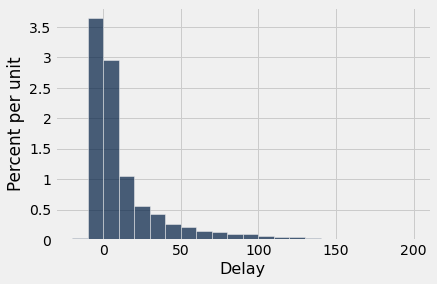

In [111]:
united.hist('Delay', bins = np.arange(-20, 201, 10))

In [112]:
min(united.column('Delay')), max(united.column('Delay'))

(-16, 580)

In [113]:
united.where('Delay', 580)

Row,Date,Flight Number,Destination,Delay
3140,6/21/15,1964,SEA,580


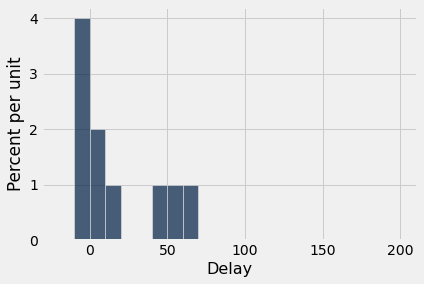

In [120]:
sample = united.sample(10)
sample.hist('Delay', bins = np.arange(-20, 201, 10))

In [121]:
np.mean(sample.column('Delay'))

16.5

In [117]:
np.mean(united.column('Delay'))

16.658155515370705

In [ ]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

## Calculation, Enumeration, Estimation ##

In [106]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [ ]:
p=make_array()
rolls=4
samples = 10000
for i in range(samples):
    p=np.append(p,np.sum(die.sample(rolls).column("Face")==6)>0)
p=np.sum(p)/samples
p


In [109]:
1-(5/6)**20

0.9739159466954111